# Анализ данных о движении транспорта
В этом проекте мы анализируем данные о движении пассажиров на различных транспортных маршрутах. Процесс включает в себя несколько этапов, таких как генерация данных, их сохранение в базе данных, анализ с использованием библиотеки pandas, визуализация, SQL-запросы и обучение модели машинного обучения для предсказания загруженности маршрутов.

**Суть проекта:**  
**Сбор данных:** используем публичные данные о транспорте (или сгенерируем сами).  
**Обработка (pandas):** чистка данных, анализ временных паттернов, выявление загруженности маршрутов.  
**SQL:** хранение данных, запросы для агрегированного анализа.  
**Визуализация (matplotlib):** графики загруженности по часам, дням недели, маршрутам.  
**ML:** построим простую модель машинного обучения для предсказания данных.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


**Генерация данных о пассажиропотоке:**  
Создаем случайные данные о количестве пассажиров для каждого из маршрутов (A, B, C, D) с частотой в 1 час на протяжении 1000 часов.

In [6]:
data = {
    "date": pd.date_range(start="2024-01-01", periods=1000, freq="h"),  # замените 'H' на 'h'
    "route": np.random.choice(["A", "B", "C", "D"], size=1000),
    "passengers": np.random.randint(5, 50, size=1000)
}
df = pd.DataFrame(data)


**Подключение и сохранение данных в SQLite:**  
Данные сохраняются в базу данных SQLite для дальнейшего анализа с помощью SQL-запросов.

In [7]:
conn = sqlite3.connect("transport.db")
df.to_sql("passenger_flow", conn, if_exists="replace", index=False)


1000

**Анализ данных с помощью pandas:**  
Мы группируем данные по маршрутам и вычисляем среднее количество пассажиров для каждого маршрута.

In [8]:
route_stats = df.groupby("route")["passengers"].mean()
print("Среднее число пассажиров по маршрутам:")
print(route_stats)


Среднее число пассажиров по маршрутам:
route
A    27.003861
B    25.454545
C    27.389831
D    24.880952
Name: passengers, dtype: float64


**Визуализация загруженности маршрутов:**  
Строим столбчатую диаграмму, чтобы наглядно увидеть, как распределяется среднее количество пассажиров по маршрутам.

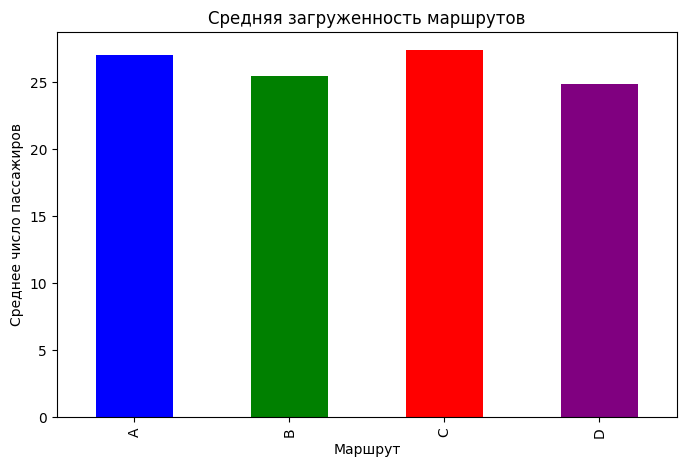

In [9]:
plt.figure(figsize=(8, 5))
df.groupby("route")["passengers"].mean().plot(kind="bar", color=['blue', 'green', 'red', 'purple'])
plt.title("Средняя загруженность маршрутов")
plt.xlabel("Маршрут")
plt.ylabel("Среднее число пассажиров")
plt.show()


**SQL-запрос для получения статистики:**  
Выполняем SQL-запрос для получения среднего числа пассажиров по каждому маршруту прямо из базы данных.

In [10]:
query = "SELECT route, AVG(passengers) FROM passenger_flow GROUP BY route"
cursor = conn.cursor()
cursor.execute(query)
print("Результаты SQL-запроса:")
print(cursor.fetchall())


Результаты SQL-запроса:
[('A', 27.003861003861005), ('B', 25.454545454545453), ('C', 27.389830508474578), ('D', 24.88095238095238)]


**Подготовка данных для машинного обучения:**  
Преобразуем категориальные данные (маршруты) в числовые значения для использования в модели линейной регрессии.

In [14]:
route_mapping = {"A": 0, "B": 1, "C": 2, "D": 3}
df["route_encoded"] = df["route"].map(route_mapping)
X = df[["route_encoded"]]
y = df["passengers"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Обучение модели машинного обучения:**  
Обучаем модель линейной регрессии на основе данных о маршруте и количестве пассажиров для предсказания загруженности.

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Оценка модели:**  
Используем метрику средней абсолютной ошибки (MAE) для оценки точности модели.

In [16]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Средняя абсолютная ошибка модели: {mae:.2f}")


Средняя абсолютная ошибка модели: 11.62
